In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/_laptop_data.csv', encoding='unicode_escape')

In [3]:
df.head()

,web-scraper-order,web-scraper-start-url,single,single-href,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,weight,num_processors,processor_brand
0,1715882222-101,https://www.amazon.ca/s?k=microsoft+laptop&i=e...,"Surface Book 2 (2017): 13.5"" Touchscreen Lapto...",https://www.amazon.ca/Microsoft-13-5-Surface-I...,"Microsoft Surface Book 2 (2017): 13.5"" Touchsc...",2287,Microsoft,Surface Book 2,13.5,_3000 x 2000,Intel Core i7,_4.2 GHz core_i7,NVIDIA,8,256 GB SSD,Windows 10 Pro,NaN,4,Intel
1,1715882215-100,https://www.amazon.ca/s?k=microsoft+laptop&i=e...,"Surface Book 3 - 15"" Touch-Screen PixelSense -...",https://www.amazon.ca/Microsoft-Surface-Book-T...,"Microsoft Surface Book 3 - 15"" Touch-Screen Pi...",2999,Microsoft,Surface Book 3,15,_3000 x 2000,Intel Core i7,NaN,NVIDIA,16,256 GB SSD,Windows 10,NaN,4,Intel
2,1715877814-82,https://www.amazon.ca/s?k=dell+laptop&i=electr...,"G15 5530 2023 Gaming Laptop ~ 15.6"" FHD 165Hz ...",https://www.amazon.ca/Dell-i9-13900HX-DDR4-2TB...,"Dell G15 5530 2023 Gaming Laptop ~ 15.6"" FHD 1...",2995,Dell,G15 5530,15.6,_1920 x 1080,Intel Core i9,_2.9 GHz intel_core_i9,NVIDIA,64,2048 GB SSD,Windows 11 Pro,NaN,24,Intel
3,1715877520-1,https://www.amazon.ca/s?k=dell+laptop&i=electr...,"Vostro 7000 7620 Laptop (2022) | 16"" FHD+ | Co...",https://www.amazon.ca/Dell-Vostro-7000-7620-La...,"Dell Vostro 7000 7620 Laptop (2022) | 16"" FHD+...",1999,Dell,Vostro 7620 Laptop,16 Inches,_1920 x 1200,Intel Core i7,_3.5 GHz core_i7,NVIDIA,8,1024 GB SSD,Windows 11 Pro,NaN,14,Intel
4,1715881880-17,https://www.amazon.ca/s?k=microsoft+laptop&i=e...,"Surface Book 2 15""(Intel Core i7, 16GB Ram, 1 ...",https://www.amazon.ca/Microsoft-Surface-Book-I...,"Microsoft Surface Book 2 15""(Intel Core i7, 16...",2999,Microsoft,Surface Book 2,15,_3000 x 2000,Intel Core i7,_4.2 GHz core_i7,NVIDIA,16,1024 GB SSD,Windows 10 Pro,NaN,4,Intel


In [4]:
df['manufacturer'].unique()

array(['Microsoft', 'Dell', 'Samsung', 'Lenovo', 'Asus', 'Acer', 'HP',
       'Apple', 'ACEMAGIC', 'LG', 'Ruzava'], dtype=object)

In [5]:
df.shape

(1262, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      1262 non-null   object
 1   web-scraper-start-url  1262 non-null   object
 2   single                 1262 non-null   object
 3   single-href            1262 non-null   object
 4   title                  1262 non-null   object
 5   price                  1262 non-null   object
 6   manufacturer           1262 non-null   object
 7   model_name             1113 non-null   object
 8   screen_size            1262 non-null   object
 9   display_resolution     1262 non-null   object
 10  cpu_model              1262 non-null   object
 11  processor              1209 non-null   object
 12  graphics_copressor     1262 non-null   object
 13  ram                    1262 non-null   int64 
 14  storage                1262 non-null   object
 15  operating_system     

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

web-scraper-order          0
web-scraper-start-url      0
single                     0
single-href                0
title                      0
price                      0
manufacturer               0
model_name               149
screen_size                0
display_resolution         0
cpu_model                  0
processor                 53
graphics_copressor         0
ram                        0
storage                    0
operating_system           0
weight                   629
num_processors             0
processor_brand            0
dtype: int64

In [9]:
cleaned_df = df.drop(columns=['web-scraper-order','web-scraper-start-url','single','single-href','weight'])

In [10]:
cleaned_df['ram'] = cleaned_df['ram'].astype('int32')

In [11]:
cleaned_df['price'] = cleaned_df['price'].str.replace(',','', regex=False).astype(float)

In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1262 non-null   object 
 1   price               1262 non-null   float64
 2   manufacturer        1262 non-null   object 
 3   model_name          1113 non-null   object 
 4   screen_size         1262 non-null   object 
 5   display_resolution  1262 non-null   object 
 6   cpu_model           1262 non-null   object 
 7   processor           1209 non-null   object 
 8   graphics_copressor  1262 non-null   object 
 9   ram                 1262 non-null   int32  
 10  storage             1262 non-null   object 
 11  operating_system    1262 non-null   object 
 12  num_processors      1262 non-null   int64  
 13  processor_brand     1262 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 133.2+ KB


/Users/shoaib/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

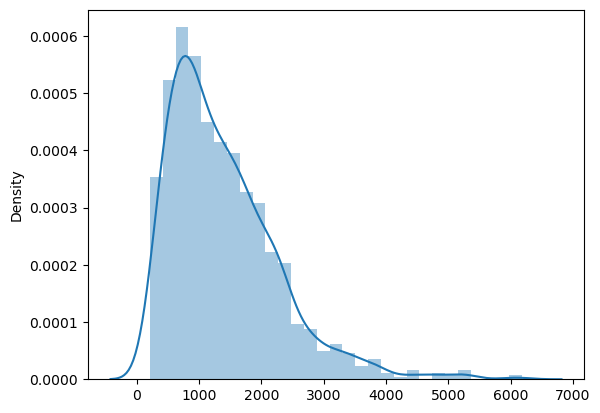

In [13]:
sns.distplot([cleaned_df['price']])

<AxesSubplot:>

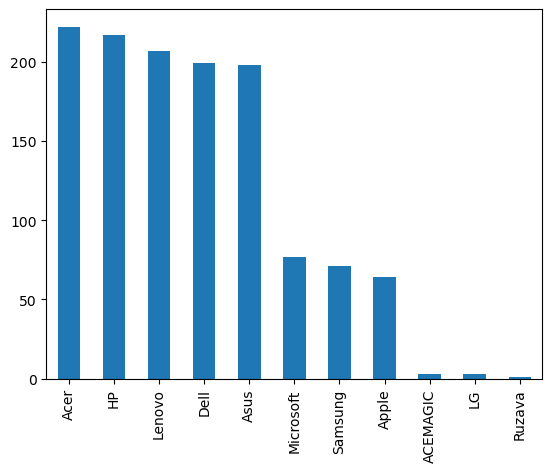

In [14]:
cleaned_df['manufacturer'].value_counts().plot(kind='bar')

In [15]:
cleaned_df['manufacturer'].value_counts()

Acer         222
HP           217
Lenovo       207
Dell         199
Asus         198
Microsoft     77
Samsung       71
Apple         64
ACEMAGIC       3
LG             3
Ruzava         1
Name: manufacturer, dtype: int64

In [16]:
# Remove rows where 'manufacturer' contains 'LG', 'Ruzava' or 'ACEMAGIC'
cleaned_df = cleaned_df[~cleaned_df['manufacturer'].str.contains('LG|Ruzava|ACEMAGIC', case=False)]

In [17]:
cleaned_df['manufacturer'].value_counts()

Acer         222
HP           217
Lenovo       207
Dell         199
Asus         198
Microsoft     77
Samsung       71
Apple         64
Name: manufacturer, dtype: int64

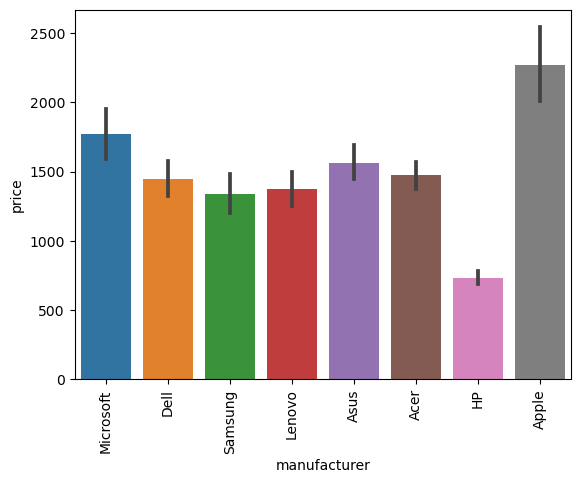

In [18]:
sns.barplot(x=cleaned_df['manufacturer'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [19]:
def is_touchable(title):
    keywords = ['touchscreen', 'touch screen', 'touch-screen']
    for keyword in keywords:
        if keyword.lower() in title.lower():
            return 1
    return 0

In [20]:
cleaned_df['touchable'] = cleaned_df['title'].apply(is_touchable)

In [21]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable
714,"HP 15.6"" HD Everyday Slim Business Laptop, Int...",639.0,HP,NaN,15.6,_1366 x 768,Intel Core i3,_3 GHz core_i3,Intel,16,512 GB SSD,Windows 11 Pro,2,Intel,0
51,"Dell G5 15 5511 15.6"" FHD Gaming Laptop - Inte...",846.0,Dell,G5,15.6,_1920 x 1080,Intel Core i5,_2.7 GHz apple_ci5,NVIDIA,8,256 GB SSD,Windows 11 Home,6,Intel,0
787,"HP 15.6"" HD Everyday Laptop, Intel Pentium Sil...",669.0,HP,NaN,15.6,_1366 x 768,Intel Pentium,_1.1 GHz pentium,Intel,16,1024 GB SSD,Windows 11,4,AMD,0
1153,"Lenovo IdeaPad 3 14"" FHD Laptop - AMD Ryzen 7 ...",648.0,Lenovo,Lenovo IdeaPad 3,14,_1920 x 1080,AMD Ryzen 7,_1.8 GHz ryzen_7,AMD,8,512 GB SSD,Windows 11 Home,8,AMD,0
1039,"Surface Laptop 3 13"" i7/16/256 Cobalt Blue Fab...",1325.0,Microsoft,Surface Laptop 3,13.5,_2256 x 1504,Intel Core i7,_3.9 GHz core_i7_1065g7,Intel,16,256 GB SSD,Windows 10 Home,4,Intel,0
1209,"Dell Inspiron 2-in-1 Touch Laptop, 14"" WUXGA I...",1104.0,Dell,Inspiron,14,_1920 x 1200,AMD Ryzen 5,_2 GHz ryzen_5,AMD,8,1024 GB SSD,Windows 11 Pro,6,AMD,0
648,Acer Aspire 5 A515 Laptop 2023 15.6Ã FHD 1920...,1591.0,Acer,Aspire 5 A515,15.6,_1920 x 1080,Intel Core i7,_2.8 GHz core_i7_family,Intel,32,1024 GB SSD,Windows 11 Home,10,Intel,0
1076,"Acer Aspire 3 Laptop, 15.6"" FHD Display, AMD R...",849.0,Acer,Aspire,15.6,_1920 x 1080,AMD Ryzen 7,_1.8 GHz ryzen_7,AMD,16,512 GB SSD,Windows 11 Pro,8,AMD,0
466,"Microsoft Surface Laptop Go - 12.4"" - Intel Co...",1109.0,Microsoft,Surface,12.3,_2736 x 1824,Intel Core i5,_3.6 GHz core_i5,Intel,8,256 GB SSD,Windows 10,4,Intel,0
1,"Microsoft Surface Book 3 - 15"" Touch-Screen Pi...",2999.0,Microsoft,Surface Book 3,15,_3000 x 2000,Intel Core i7,NaN,NVIDIA,16,256 GB SSD,Windows 10,4,Intel,1


<AxesSubplot:>

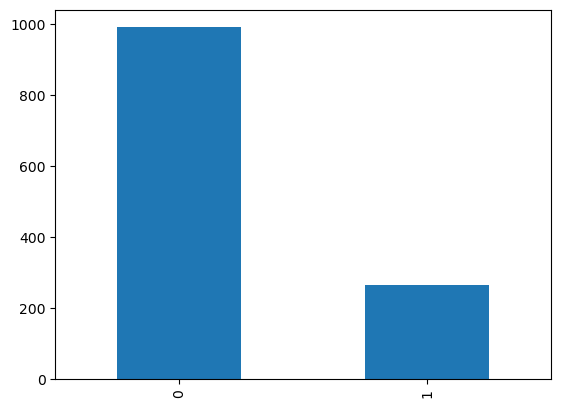

In [22]:
cleaned_df['touchable'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='touchable', ylabel='price'>

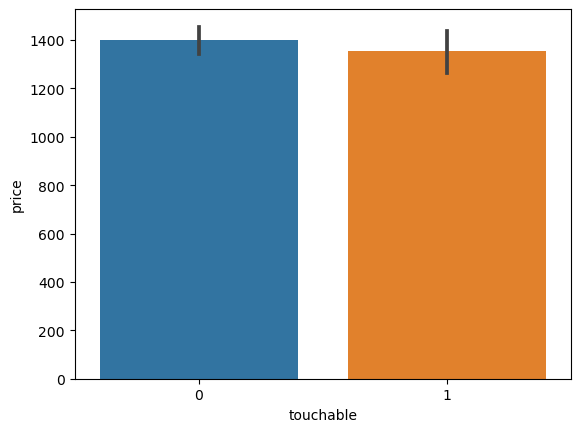

In [23]:
sns.barplot(x=cleaned_df['touchable'], y=cleaned_df['price'])

In [24]:
def is_ips(title):
    if "IPS".lower() in title.lower():
            return 1
    return 0

In [25]:
cleaned_df['ips'] = cleaned_df['title'].apply(is_ips)

In [26]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips
176,"Newest Acer Nitro 5 15.6Ã FHD Gaming Laptop, ...",1199.0,Acer,NH. Q59AA. 002,15.6,_1920x1080,Intel Core i5,_2.4 GHz core_i5,NVIDIA,32,256 GB SSD,Windows 10,4,Intel,0,0
358,Apple 2024 MacBook Air 15-inch Laptop with M3 ...,1749.0,Apple,MacBook Air,15.3 Inches,_2880 x 1864,M3,8,Mac,8,512 GB SSD,Mac OS,8,Apple,0,0
474,Samsung Galaxy Book2 15.6 Inch Amoled i7 (inte...,1189.0,Samsung,Galaxy Book2,15.6,_1920 x 1080,Intel Core i7,_1.7 GHz apple_ci7,Intel,8,256 GB SSD,Windows 11 Home,4,Intel,0,0
6,"Samsung Galaxy Book4 Ultra Laptop, 16"", Intel ...",3599.0,Samsung,Galaxy Book4 Ultra,16 Inches,_2880 x 1800,Intel Core i9,_5.1 GHz core_i9,NVIDIA,32,1024 GB SSD,Windows 11 Home,16,Intel,0,0
21,"Lenovo Legion Pro 5i Gaming Laptop 2023 16"" WQ...",2779.0,Lenovo,Legion Pro 5i,16 Inches,_2560 x 1600,Intel Core i7,_2.9 GHz core_i7_family,NVIDIA,32,2048 GB SSD,Windows 11 Pro,16,Intel,0,1
1057,"Lenovo ThinkPad E14 G3 14"" FHD Business Laptop...",1399.0,Lenovo,ThinkPad,14,_1920 x 1080,AMD Ryzen 7,_1.8 GHz ryzen_7,AMD,40,2048 GB SSD,Windows 10 Pro,8,AMD,0,0
1098,"ASUS Vivobook 16 16'' FHD Business Laptop, AMD...",1089.0,Asus,VivoBook,16 Inches,_1920 x 1080 pixels,AMD Ryzen 7,_3.2 GHz ryzen_7,AMD,40,2048 GB SSD,_Windows 11 Home,8,_AMD,0,0
57,"ASUS ROG Strix G17 Gaming Laptop, 17.3"" QHD 24...",3099.0,Asus,ROG Strix,17.3 Inches,_1920 x 1200 pixel,AMD Ryzen 9,_3 GHz ryzen_9,NVIDIA,32,2048 GB SSD,_Windows 11 Pro,12,_AMD,0,0
502,"HP Pavilion x360 15 inch Laptop, FHD Display, ...",1144.0,HP,HP Pavilion x360 Convertible,15,_1920 x 1080,Intel Core i5,_core_i5,Intel,8,512 GB SSD,Windows 11,1,Intel,0,0
836,"Lenovo Ideapad 1 14"" HD Laptop, Intel Celeron ...",279.0,Lenovo,IdeaPad,14,_1366 x 768,Intel Celeron,_1.1 GHz celeron_n,Intel,4,64 GB Emmc,Windows 11,2,Intel,0,0


<AxesSubplot:>

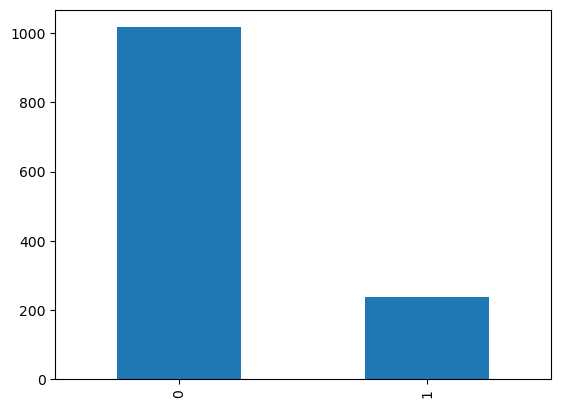

In [27]:
cleaned_df['ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ips', ylabel='price'>

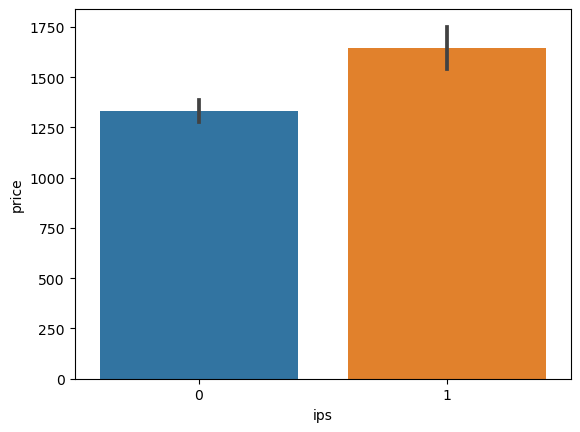

In [28]:
sns.barplot(x=cleaned_df['ips'], y=cleaned_df['price'])

In [29]:
new = cleaned_df['display_resolution'].str.split('x', n=1, expand=True)

In [30]:
cleaned_df['x_res'] = new[0]
cleaned_df['y_res'] = new[1]

In [31]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,x_res,y_res
517,"HP 15.6"" FHD IPS Touchscreen Laptop, 11th Gen ...",989.0,HP,NaN,15.6,_1920 x 1080,Intel Core i7,_2.8 GHz core_i7,Intel,16,512 GB SSD,Windows 11 Home,4,Intel,1,1,_1920,1080
467,"Microsoft Surface Laptop 2 (2018): 13.5"" Touch...",1699.0,Microsoft,Surface Laptop 2,13.5,_2256 x 1504,Intel Core i5,NaN,Intel,8,256 GB SSD,Windows 10 Home,4,Intel,1,0,_2256,1504
967,"Microsoft Surface Laptop (2017): 13.5"" Touchsc...",1376.0,Microsoft,Microsoft Surface,13.5,_2256 x 1504,Intel Core i7,_4 GHz core_i7,Intel,16,512 GB SSD,Windows 10 S,2,Intel,0,0,_2256,1504
919,"Lenovo Thinkpad E16 Gen 1 16"" WUXGA (1920 x 12...",1259.0,Lenovo,Lenovo Thinkpad E16 Gen 1,16 Inches,_1920 x 1200,Intel Core i7,_3.7 GHz core_i7,Intel,16,512 GB SSD,Windows 11 Pro,10,Intel,0,0,_1920,1200
71,"ASUS ROG Flow X13 (2023) 2-in-1 Gaming Laptop,...",2199.0,Asus,ASUS ROG Flow X13 (2023) 2-in-1 Gaming Laptop,13.4,_2560 x 1600 pixels,AMD Ryzen 9,_4 GHz ryzen_9,NVIDIA,16,1024 GB SSD,_Windows 11 Home,8,_AMD,0,0,_2560,1600 pixels
1133,"2023 Dell Inspiron 15 I3525 15.6"" FHD IPS Lapt...",1309.0,Dell,Inspiron 15,15.6,_1920 x 1080,AMD Ryzen 7,_2 GHz ryzen_7,AMD,32,1024 GB SSD,Windows 11 Pro,8,AMD,0,1,_1920,1080
896,"Lenovo 100e 2nd Gen 11.6"" HD Laptop - Intel Ce...",264.0,Lenovo,Lenovo 100e 2nd Gen,11.6,_1366 x 768,Intel Celeron,_1.1 GHz celeron_n4020,Intel,16,128 GB SSD,Windows 10 Pro,2,Intel,0,0,_1366,768
511,"Acer Swift Go 14 Business Laptop 14"" WUXGA IPS...",1659.0,Acer,Swift Go 14,14,_1920 x 1200,Intel Core i7,_2.9 GHz core_i7_family,Intel,16,512 GB SSD,Windows 11 Pro,14,Intel,1,1,_1920,1200
1188,Samsung Electronics XE500C13 Chromebook 3 2GB ...,421.0,Samsung,XE500C13-S03US,11.6,_1366 x 768,Intel Celeron D,_1.6 GHz intel_celeron_d,Intel,2,16 GB SSD,Chrome OS,2,Intel,0,0,_1366,768
446,"Acer Swift 3 SF314-511-79TK, 14"" FHD 1920x1080...",1099.0,Acer,SF314-511-79TK,14,_1920 x 1080,Intel Core i7,_2.8 GHz core_i7,Intel,8,512 GB SSD,Windows 11 Home,1,Intel,0,1,_1920,1080


In [32]:
cleaned_df['x_res'] = cleaned_df['x_res'].str.replace('_','', regex=False).astype(int)

In [33]:
cleaned_df['y_res'].unique()

array([' 2000', ' 1080', ' 1200', ' 1800', ' 2160', ' 1440', ' 1600',
       ' 1600 pixels', '1080', ' 1200 pixel', ' 1080 pixels',
       ' 1440 pixels', ' 1080 pixel', ' 1824 pixel', ' 1440 pixel',
       ' 1600 pixel', ' 1620 pixel', ' 1920', ' 2400', '1200', '2400',
       ' 1800 pixels', '2160', ' 768', ' 720', ' 1664', ' 1964', ' 1864',
       ' 2234', ' 1504', '1824', ' 1024', ' 1280', ' 800', ' 1200 pixels',
       ' 1824', ' 1400', ' 1620', ' 1800 pixel', ' 768 pixels', ' 1350',
       ' 900'], dtype=object)

In [34]:
cleaned_df['y_res'] = cleaned_df['y_res'].str.replace(r'\D', '', regex=True).astype(int)

In [35]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,x_res,y_res
999,"Dell Vostro 3520 15.6"" FHD Laptop - Intel Core...",879.0,Dell,Dell Vostro 3520,15.6,_1920 x 1080,Intel Core i5,_2.4 GHz core_i5,Intel,16,512 GB SSD,Windows 11 Pro,4,Intel,0,0,1920,1080
584,"HP Envy 17.3"" FHD Touchscreen Laptop, Intel Co...",1999.0,HP,Envy,17.3 Inches,_1920 x 1080,Intel Core i7,_2.1 GHz core_i7,Intel,64,2048 GB SSD,Windows 11 Pro,12,Intel,1,0,1920,1080
1198,"ASUS ExpertBook B1 Business Laptop, B1502CVA-P...",1235.0,Asus,Asus B1 Series,15.6,_1920 x 1080 pixels,Intel Core i7,_1.8 core_i7,Intel,16,1024 GB SSD,_Windows 11 Pro,1,_Intel,0,0,1920,1080
31,"Lenovo Legion 5 Pro 16"" QHD 165Hz Gaming Lapto...",2949.0,Lenovo,Lenovo Legion 5 Pro,16 Inches,_2560 x 1600,AMD Ryzen 7,_3.2 GHz ryzen_7,NVIDIA,64,2048 GB SSD,Windows 11 Home,8,AMD,0,0,2560,1600
546,"Dell 15 3000 Inspiron 15.6"" 3530 15"" Touch Tou...",1469.0,Dell,Inspiron,15.6,_1920 x 1080,Intel Core i7,_1.7 GHz core_i7,Intel,32,3072 GB SSD,Windows 11 Pro,10,Intel,1,0,1920,1080
181,"ASUS ROG Strix G17 17.3"" 144Hz FHD Gaming Lapt...",2199.0,Asus,ROG Strix,17.3 Inches,_1920 x 1080 pixel,AMD Ryzen 7,_3.2 GHz ryzen_7,NVIDIA,32,2048 GB SSD,_Windows 11 Pro,8,_AMD,0,0,1920,1080
615,"Dell Inspiron 14 Laptop 2023, 14"" 2.2K IPS, In...",1389.0,Dell,Dell Inspiron 14,14,_2240 x 1400,Intel Core i7,_2.4 GHz core_i7_family,Intel,16,1024 GB SSD,Windows 11 Pro,14,Intel,0,1,2240,1400
702,"HP 17 inch Laptop, FHD Display, Intel N200, 8 ...",699.0,HP,HP Laptop 17-cn3000ca,14,_1920 x 1080,Intel Celeron,_3.7 GHz celeron_n,Intel,8,512 GB SSD,Windows 11 Home,10,Intel,0,0,1920,1080
680,"HP Stream 14"" HD BrightView Laptop, Intel Cele...",379.0,HP,Stream,14,_1366 x 768,Intel Celeron,_1.1 GHz celeron_n,Intel,4,64 GB SSD,Windows 11 S,2,Intel,0,0,1366,768
272,Acer Nitro 17 Gaming Laptop 2023 17.3Ã WQXGA ...,2266.0,Acer,Nitro 17,17.3 Inches,_2560 x 1600,AMD Ryzen 7,_2.8 GHz ryzen_7,NVIDIA,16,1024 GB SSD,Windows 11 Pro,8,AMD,0,1,2560,1600


In [36]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1261
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1255 non-null   object 
 1   price               1255 non-null   float64
 2   manufacturer        1255 non-null   object 
 3   model_name          1107 non-null   object 
 4   screen_size         1255 non-null   object 
 5   display_resolution  1255 non-null   object 
 6   cpu_model           1255 non-null   object 
 7   processor           1203 non-null   object 
 8   graphics_copressor  1255 non-null   object 
 9   ram                 1255 non-null   int32  
 10  storage             1255 non-null   object 
 11  operating_system    1255 non-null   object 
 12  num_processors      1255 non-null   int64  
 13  processor_brand     1255 non-null   object 
 14  touchable           1255 non-null   int64  
 15  ips                 1255 non-null   int64  
 16  x_res 

In [37]:
cleaned_df.corr()['price']

price             1.000000
ram               0.505469
num_processors    0.596594
touchable        -0.022500
ips               0.139814
x_res             0.620967
y_res             0.637042
Name: price, dtype: float64

In [38]:
cleaned_df['screen_size'].unique()

array(['13.5', '15', '15.6', '16 Inches', '14.4', '17.3 Inches', '14',
       '13.4', '17 Inches', '11.6', '13.6 Inches', '14.2 Inches',
       '15.3 Inches', '16.2 Inches', '13.3', '12.3', '10.5'], dtype=object)

In [39]:
cleaned_df['screen_size'] = cleaned_df['screen_size'].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)

In [40]:
cleaned_df['screen_size'].unique()

array([13.5, 15. , 15.6, 16. , 14.4, 17.3, 14. , 13.4, 17. , 11.6, 13.6,
       14.2, 15.3, 16.2, 13.3, 12.3, 10.5])

In [41]:
cleaned_df['ppi'] = (((cleaned_df['x_res']**2) + (cleaned_df['y_res']**2))**0.5/cleaned_df['screen_size']).astype('float')

In [42]:
cleaned_df.sample()

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,x_res,y_res,ppi
302,Acer Nitro 5 AN515-46-R0EQ Gaming Laptop | AMD...,1869.0,Acer,Nitro 5,15.6,_2560 x 1440,AMD Ryzen 7,_4.70 ryzen_7,NVIDIA,32,1024 GB SSD,Windows 11 Home,8,AMD,0,1,2560,1440,188.282664


In [43]:
cleaned_df.drop(columns=['display_resolution'], inplace=True)

In [44]:
cleaned_df

,title,price,manufacturer,model_name,screen_size,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,x_res,y_res,ppi
0,"Microsoft Surface Book 2 (2017): 13.5"" Touchsc...",2287.0,Microsoft,Surface Book 2,13.5,Intel Core i7,_4.2 GHz core_i7,NVIDIA,8,256 GB SSD,Windows 10 Pro,4,Intel,1,0,3000,2000,267.077872
1,"Microsoft Surface Book 3 - 15"" Touch-Screen Pi...",2999.0,Microsoft,Surface Book 3,15.0,Intel Core i7,NaN,NVIDIA,16,256 GB SSD,Windows 10,4,Intel,1,0,3000,2000,240.370085
2,"Dell G15 5530 2023 Gaming Laptop ~ 15.6"" FHD 1...",2995.0,Dell,G15 5530,15.6,Intel Core i9,_2.9 GHz intel_core_i9,NVIDIA,64,2048 GB SSD,Windows 11 Pro,24,Intel,0,0,1920,1080,141.211998
3,"Dell Vostro 7000 7620 Laptop (2022) | 16"" FHD+...",1999.0,Dell,Vostro 7620 Laptop,16.0,Intel Core i7,_3.5 GHz core_i7,NVIDIA,8,1024 GB SSD,Windows 11 Pro,14,Intel,0,0,1920,1200,141.509717
4,"Microsoft Surface Book 2 15""(Intel Core i7, 16...",2999.0,Microsoft,Surface Book 2,15.0,Intel Core i7,_4.2 GHz core_i7,NVIDIA,16,1024 GB SSD,Windows 10 Pro,4,Intel,0,0,3000,2000,240.370085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,"Lenovo ThinkPad T14s Gen 3 Business Laptop, 14...",1349.0,Lenovo,ThinkPad,14.0,AMD Ryzen 7,_2.7 GHz ryzen_7,AMD,16,1024 GB SSD,Windows 11 Pro,8,AMD,1,1,1920,1080,157.350512
1258,"Lenovo IdeaPad 15.6"" FHD Laptop, Intel Pentium...",589.0,Lenovo,Lenovo IdeaPad,15.6,Intel Pentium,_1.1 GHz pentium,Intel,20,1024 GB SSD,Windows 11,4,Intel,0,0,1920,1080,141.211998
1259,"Lenovo ThinkPad P1 Gen 6 21FV001UUS 16"" Mobile...",5340.0,Lenovo,ThinkPad P1 Gen 6,16.0,Intel Core i9,_core_i9,NVIDIA,32,1024 GB SSD,Windows 11 Pro,1,Intel,0,0,2560,1600,188.679623
1260,"Lenovo ThinkPad Laptop 2023 New, 14"" FHD IPS T...",1848.0,Lenovo,Lenovo ThinkPad P14s Gen 2 20VX Laptop,14.0,Intel Core i7,_3.1 GHz core_i7_family,NVIDIA,32,1024 GB SSD,Windows 10 Pro,4,Intel,1,1,1920,1080,157.350512


In [45]:
cleaned_df.drop(columns=['screen_size', 'x_res', 'y_res'], inplace=True)

In [46]:
cleaned_df['cpu_model'].unique()

array(['Intel Core i7', 'Intel Core i9', 'Intel Core i5', 'Intel Xeon',
       'AMD Ryzen 7', 'AMD Ryzen 5', 'AMD Ryzen 9', 'Intel Celeron',
       'MediaTek', 'M3', 'M3 ', 'M2  ', 'M2', 'M3 Pro', 'M2 Pro',
       'M3 Max', 'Intel Core i3', 'Intel Atom', 'Intel Celeron D',
       'Intel Pentium', 'Intel Processor N100', 'Intel Core m3',
       'AMD Ryzen 3', 'AMD  ', 'AMD Athlon', 'AMD Ryzen 4', 'AMD'],
      dtype=object)

In [47]:
cleaned_df['cpu_model'] = cleaned_df['cpu_model'].str.strip()

In [48]:
cleaned_df['cpu_model'].unique()

array(['Intel Core i7', 'Intel Core i9', 'Intel Core i5', 'Intel Xeon',
       'AMD Ryzen 7', 'AMD Ryzen 5', 'AMD Ryzen 9', 'Intel Celeron',
       'MediaTek', 'M3', 'M2', 'M3 Pro', 'M2 Pro', 'M3 Max',
       'Intel Core i3', 'Intel Atom', 'Intel Celeron D', 'Intel Pentium',
       'Intel Processor N100', 'Intel Core m3', 'AMD Ryzen 3', 'AMD',
       'AMD Athlon', 'AMD Ryzen 4'], dtype=object)

<AxesSubplot:>

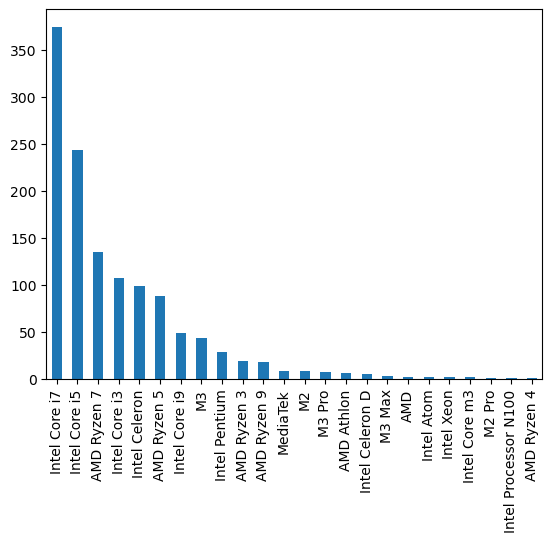

In [49]:
cleaned_df['cpu_model'].value_counts().plot(kind='bar')

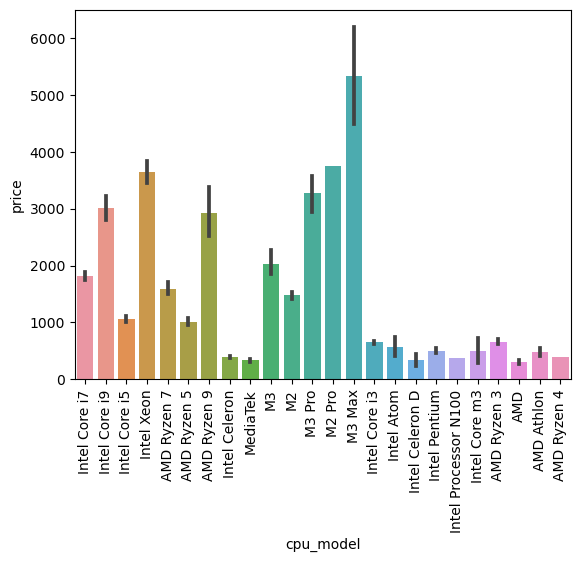

In [51]:
sns.barplot(x=cleaned_df['cpu_model'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
cleaned_df['cpu_model'].value_counts()

Intel Core i7           374
Intel Core i5           243
AMD Ryzen 7             135
Intel Core i3           107
Intel Celeron            99
AMD Ryzen 5              88
Intel Core i9            49
M3                       44
Intel Pentium            29
AMD Ryzen 3              19
AMD Ryzen 9              18
MediaTek                  9
M2                        9
M3 Pro                    7
AMD Athlon                6
Intel Celeron D           5
M3 Max                    3
AMD                       2
Intel Atom                2
Intel Xeon                2
Intel Core m3             2
M2 Pro                    1
Intel Processor N100      1
AMD Ryzen 4               1
Name: cpu_model, dtype: int64

In [53]:
def fetch_processor(text):
    if text == 'Intel Core i9' or text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3' or text == 'Intel Celeron':
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    elif text == 'AMD Ryzen 9' or text == 'AMD Ryzen 7' or text == 'AMD Ryzen 5':
        return text
    elif text.split()[0] == 'AMD':
        return 'Other AMD Processor'
    elif text == 'M2' or text == 'M2 Pro' or text == 'M3' or text == 'M3 Max' or text == 'M3 Pro':
        return "Mac Processor"
    elif text == 'MediaTek':
        return text
    else:
        return 'Other'

In [54]:
cleaned_df['cpu_name'] = cleaned_df['cpu_model'].apply(fetch_processor)

In [55]:
cleaned_df['cpu_model'].unique()

array(['Intel Core i7', 'Intel Core i9', 'Intel Core i5', 'Intel Xeon',
       'AMD Ryzen 7', 'AMD Ryzen 5', 'AMD Ryzen 9', 'Intel Celeron',
       'MediaTek', 'M3', 'M2', 'M3 Pro', 'M2 Pro', 'M3 Max',
       'Intel Core i3', 'Intel Atom', 'Intel Celeron D', 'Intel Pentium',
       'Intel Processor N100', 'Intel Core m3', 'AMD Ryzen 3', 'AMD',
       'AMD Athlon', 'AMD Ryzen 4'], dtype=object)

In [56]:
cleaned_df['cpu_name'].unique()

array(['Intel Core i7', 'Intel Core i9', 'Intel Core i5',
       'Other Intel Processor', 'AMD Ryzen 7', 'AMD Ryzen 5',
       'AMD Ryzen 9', 'Intel Celeron', 'MediaTek', 'Mac Processor',
       'Intel Core i3', 'Other AMD Processor'], dtype=object)

<AxesSubplot:>

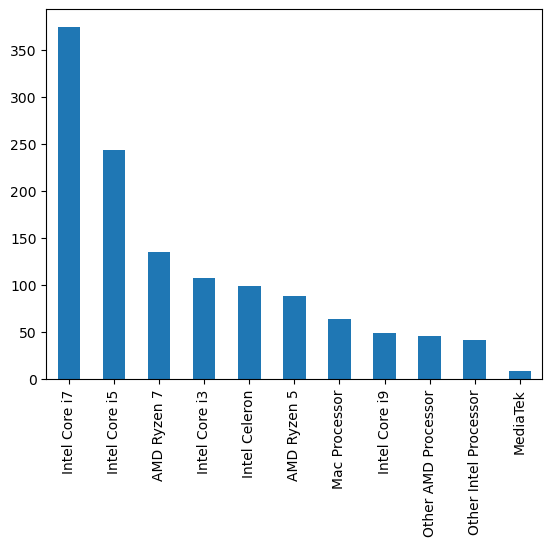

In [183]:
cleaned_df['cpu_name'].value_counts().plot(kind='bar')

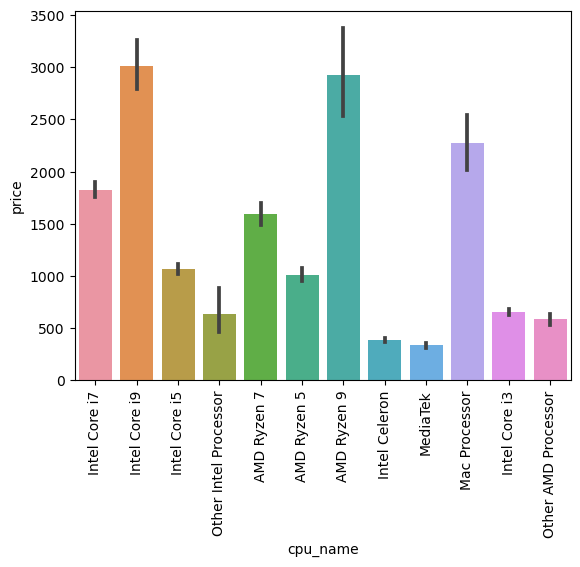

In [58]:
sns.barplot(x=cleaned_df['cpu_name'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
cleaned_df['cpu_name'].value_counts()

Intel Core i7            374
Intel Core i5            243
AMD Ryzen 7              135
Intel Core i3            107
Intel Celeron             99
AMD Ryzen 5               88
Mac Processor             64
Intel Core i9             49
Other Intel Processor     41
Other AMD Processor       28
AMD Ryzen 9               18
MediaTek                   9
Name: cpu_name, dtype: int64

In [185]:
#cleaned_df = cleaned_df[~cleaned_df['cpu_name'].str.contains('MediaTek', case=False)]

In [186]:
#cleaned_df['cpu_name'].value_counts()

Intel Core i7            374
Intel Core i5            243
AMD Ryzen 7              135
Intel Core i3            107
Intel Celeron             99
AMD Ryzen 5               88
Mac Processor             64
Intel Core i9             49
Other AMD Processor       46
Other Intel Processor     41
Name: cpu_name, dtype: int64

In [61]:
# sns.barplot(x=cleaned_df['cpu_name'], y=cleaned_df['price'])
# plt.xticks(rotation='vertical')
# plt.show()

<AxesSubplot:>

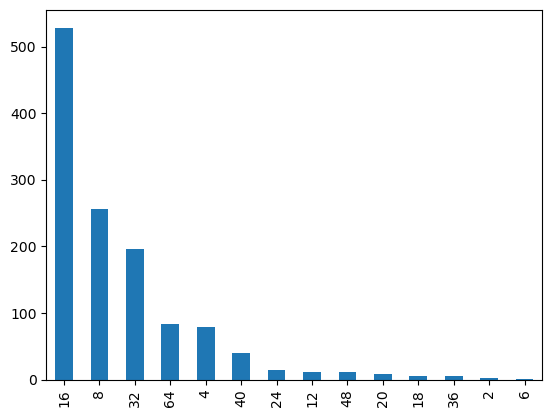

In [188]:
cleaned_df['ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ram', ylabel='price'>

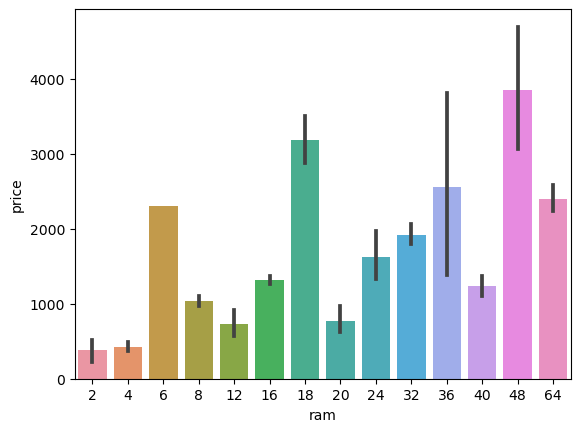

In [189]:
sns.barplot(x=cleaned_df['ram'], y=cleaned_df['price'])

In [64]:
cleaned_df[cleaned_df['ram']==36]

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,ppi,cpu_name
390,Apple 2023 MacBook Pro Laptop M3 Pro chip with...,3799.0,Apple,MacBook Pro,M3 Pro,12,Mac,36,512 GB SSD,Mac OS,12,Apple,0,0,254.023349,Mac Processor
395,Apple 2023 MacBook Pro Laptop M3 Max chip with...,4488.0,Apple,MacBook Pro,M3 Max,14,Mac,36,1024 GB SSD,Mac OS,14,Apple,0,0,253.930343,Mac Processor
396,Apple 2023 MacBook Pro Laptop M3 Max chip with...,4349.0,Apple,MacBook Pro,M3,14,Mac,36,1024 GB SSD,Mac OS,14,Apple,0,0,253.930343,Mac Processor
554,"ASUS Vivobook 15.6Ó FHD Touchscreen Laptop, In...",939.0,Asus,VivoBook,Intel Core i5,_2.4 GHz core_i5,Intel,36,2048 GB SSD,_Windows 11 Pro,4,_Intel,1,0,141.211998,Intel Core i5
601,"ASUS Vivobook 15.6Ó FHD Touchscreen Laptop, In...",879.0,Asus,VivoBook,Intel Core i5,_2.4 GHz core_i5,Intel,36,1024 GB SSD,_Windows 11 Pro,4,_Intel,1,0,141.211998,Intel Core i5
602,"ASUS Vivobook 15.6Ó FHD Touchscreen Laptop, In...",879.0,Asus,VivoBook,Intel Core i5,_2.4 GHz core_i5,Intel,36,1024 GB SSD,_Windows 11 Pro,4,_Intel,1,0,141.211998,Intel Core i5


In [65]:
cleaned_df['storage'].unique()

array(['256 GB SSD', '2048 GB SSD', '1024 GB SSD', '512 GB SSD',
       '4096 GB SSD', '3072 GB SSD', '8192 GB SSD', '128 GB SSD',
       '32 GB Emmc', '64 GB Emmc', '64 GB SSD', '128 GB Emmc',
       '16 GB Emmc', '16 GB SSD'], dtype=object)

<AxesSubplot:>

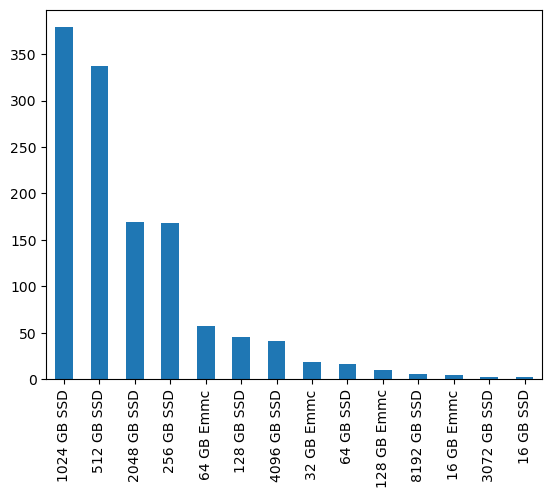

In [66]:
cleaned_df['storage'].value_counts().plot(kind='bar')

In [67]:
cleaned_df['storage'].str.strip().unique()

array(['256 GB SSD', '2048 GB SSD', '1024 GB SSD', '512 GB SSD',
       '4096 GB SSD', '3072 GB SSD', '8192 GB SSD', '128 GB SSD',
       '32 GB Emmc', '64 GB Emmc', '64 GB SSD', '128 GB Emmc',
       '16 GB Emmc', '16 GB SSD'], dtype=object)

In [68]:
def set_storage_range(text):
    if text == '1024 GB SSD' or text == '512 GB SSD' or text == '256 GB SSD' or text == '2048 GB SSD':
        return text
    elif text == '3072 GB SSD' or text == '4096 GB SSD' or text == '8192 GB SSD':
        return '3072 GB SSD or Above'
    elif text == '128 GB SSD' or text == '64 GB SSD' or text == '32 GB SSD' or text == '16 GB SSD':
        return '128 GB SSD or Below'
    elif text == '128 GB Emmc' or text == '64 GB Emmc':
        return '64 GB Emmc or Above'
    elif text == '16 GB Emmc' or text == '32 GB Emmc':
        return '32 GB Emmc or Below'

In [69]:
cleaned_df['storage'].str.contains('Emmc', case= False).value_counts()

False    1165
True       90
Name: storage, dtype: int64

In [70]:
cleaned_df['storage'].str.split()

0        [256, GB, SSD]
1        [256, GB, SSD]
2       [2048, GB, SSD]
3       [1024, GB, SSD]
4       [1024, GB, SSD]
             ...       
1257    [1024, GB, SSD]
1258    [1024, GB, SSD]
1259    [1024, GB, SSD]
1260    [1024, GB, SSD]
1261    [1024, GB, SSD]
Name: storage, Length: 1255, dtype: object

In [71]:
cleaned_df['storage_range_category'] = cleaned_df['storage'].apply(set_storage_range)

In [72]:
cleaned_df['storage_range_category'].value_counts()

1024 GB SSD             379
512 GB SSD              337
2048 GB SSD             169
256 GB SSD              168
64 GB Emmc or Above      67
128 GB SSD or Below      63
3072 GB SSD or Above     49
32 GB Emmc or Below      23
Name: storage_range_category, dtype: int64

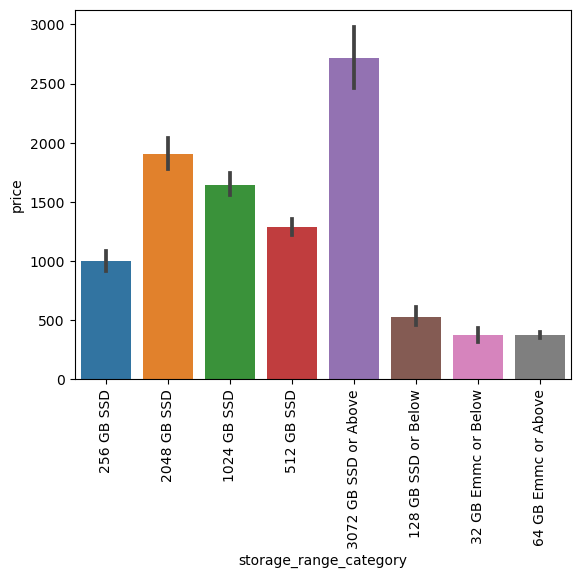

In [73]:
sns.barplot(x=cleaned_df['storage_range_category'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [74]:
cleaned_df['storage_range_category'].unique()

array(['256 GB SSD', '2048 GB SSD', '1024 GB SSD', '512 GB SSD',
       '3072 GB SSD or Above', '128 GB SSD or Below',
       '32 GB Emmc or Below', '64 GB Emmc or Above'], dtype=object)

In [75]:
np.array(cleaned_df['storage_range_category'].sample(10))

array(['2048 GB SSD', '1024 GB SSD', '512 GB SSD', '1024 GB SSD',
       '256 GB SSD', '512 GB SSD', '512 GB SSD', '2048 GB SSD',
       '1024 GB SSD', '512 GB SSD'], dtype=object)

In [76]:
cleaned_df['ssd'] = 0
cleaned_df['emmc'] = 0

In [77]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,ppi,cpu_name,storage_range_category,ssd,emmc
509,Dell XPS 13 9320 Laptop - 13.4-inch OLED 3.5K ...,2177.0,Dell,Dell XPS 13 9320 Laptop,Intel Core i7,_5 GHz core_i7_family,Intel,16,512 GB SSD,Windows 11 Home,12,Intel,1,0,304.140287,Intel Core i7,512 GB SSD,0,0
857,"HP Stream 14'' HD Laptop, Intel Celeron N4020 ...",399.0,HP,Stream,Intel Celeron,_1.1 GHz celeron_n,Intel,8,64 GB Emmc,Windows 11,2,Intel,0,0,111.935204,Intel Celeron,64 GB Emmc or Above,0,0
129,"2023 Acer Nitro 5 Gaming Laptop 15.6"" FHD 144H...",1579.0,Acer,AN515-55-57C4,Intel Core i5,_2.5 GHz core_i5_family,NVIDIA,16,512 GB SSD,Windows 11 Home,4,Intel,0,1,141.211998,Intel Core i5,512 GB SSD,0,0
393,Apple 2023 MacBook Pro Laptop M3 Pro chip with...,3249.0,Apple,MacBook Pro,M3 Pro,12,Mac,18,1024 GB SSD,Mac OS,12,Apple,0,0,253.930343,Mac Processor,1024 GB SSD,0,0
470,Microsoft DAJ-00002 Surface Laptop (1st Gen) L...,2034.0,Microsoft,Surface Laptop,Intel Core i7,_4 GHz core_i7,Intel,8,256 GB SSD,Windows 10,2,Intel,0,0,200.842560,Intel Core i7,256 GB SSD,0,0
975,"Acer Swift 3 13.5"" QHD (2256 x 1504) Business ...",899.0,Acer,NaN,Intel Core i7,_2.5 GHz core_i7,Intel,16,512 GB SSD,Windows 10 Home,14,Intel,0,0,193.669611,Intel Core i7,512 GB SSD,0,0
261,Acer Nitro 5 AN517-54-79L1 Gaming Laptop | Int...,1759.0,Acer,NaN,Intel Core i7,_4.6 GHz,NVIDIA,16,1024 GB SSD,Windows 11 Home,8,Intel,0,1,127.335675,Intel Core i7,1024 GB SSD,0,0
608,"ASUS VivoBook 15 15.6"" FHD Laptop, Intel Core ...",1159.0,Asus,VivoBook,Intel Core i5,_1.7 GHz core_i5,Intel,40,1024 GB SSD,_Windows 11 Home,12,_Intel,0,0,141.211998,Intel Core i5,1024 GB SSD,0,0
593,"ASUS VivoBook 15.6"" Touchscreen FHD Laptop, 12...",999.0,Asus,VivoBook,Intel Core i7,NaN,Intel,16,1024 GB SSD,_Windows 11 Pro,12,_Intel,1,0,143.980861,Intel Core i7,1024 GB SSD,0,0
84,"Acer Predator Helios Gaming Laptop, 16"" 240Hz ...",3324.0,Acer,Predator,Intel Core i9,_3.9 GHz core_i9,NVIDIA,32,1024 GB SSD,Windows 11 Pro,24,Intel,0,0,188.679623,Intel Core i9,1024 GB SSD,0,0


In [78]:
cleaned_df.loc[cleaned_df['storage_range_category'].str.contains('SSD'), 'ssd'] = cleaned_df['storage_range_category'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
cleaned_df.loc[cleaned_df['storage_range_category'].str.contains('Emmc'), 'emmc'] = cleaned_df['storage_range_category'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [79]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,ppi,cpu_name,storage_range_category,ssd,emmc
211,Acer Nitro 17 Gaming Laptop 2023 17.3Ã WQXGA ...,2631.0,Acer,Nitro 17,AMD Ryzen 7,_2.8 GHz ryzen_7,NVIDIA,48,2048 GB SSD,Windows 10 Home,8,AMD,0,1,174.501385,AMD Ryzen 7,2048 GB SSD,2048,0
14,"LENOVO IdeaPad Gaming 3 15.6"" FHD Laptop, AMD ...",1439.0,Lenovo,IdeaPad,AMD Ryzen 5,_3.3 GHz ryzen_5,NVIDIA,64,4096 GB SSD,Windows 11 Pro,6,AMD,0,0,141.211998,AMD Ryzen 5,3072 GB SSD or Above,3072,0
856,"HP Portable Laptop, Student and Business, 14"" ...",339.0,HP,NaN,Intel Celeron,_1.1 GHz celeron,Intel,4,64 GB Emmc,Windows 11 Home,2,Intel,0,0,111.935204,Intel Celeron,64 GB Emmc or Above,0,64
531,2023 Acer Aspire 5 15.6Ã FHD IPS Laptop 8-Cor...,835.0,Acer,Aspire 5 15,Intel Core i5,_2.1 GHz core_i5_family,Intel,16,512 GB SSD,Windows 11 Home,8,Intel,0,1,141.211998,Intel Core i5,512 GB SSD,512,0
237,"ASUS TUF Gaming Laptop 2023-15.6"" FHD NVIDIA G...",2023.0,Asus,TUF FX507,Intel Core i7,_2.4 GHz core_i7_family,NVIDIA,32,1024 GB SSD,_Windows 10 Home,14,_Intel,0,0,141.211998,Intel Core i7,1024 GB SSD,1024,0
262,"HP Envy 17 inch Laptop, FHD Display, 13th Gene...",1673.0,HP,HP ENVY 17.3 inch Laptop PC 17-cr1000ca,Intel Core i7,_5 GHz core_i7,NVIDIA,16,1024 GB SSD,Windows 11 Home,10,Intel,0,0,127.335675,Intel Core i7,1024 GB SSD,1024,0
895,"Lenovo Ideapad 3i 15.6"" FHD Touchscreen Laptop...",679.0,Lenovo,NaN,Intel Core i3,_1.7 GHz core_i3,Intel,16,1024 GB SSD,Windows 11,2,Intel,1,0,141.211998,Intel Core i3,1024 GB SSD,1024,0
1002,Microsoft Surface Laptop 5 13I5/16/512CM WIN11...,2126.0,Microsoft,Surface,Intel Core i5,NaN,Intel,16,512 GB SSD,Windows 11,6,Intel,0,0,221.976027,Intel Core i5,512 GB SSD,512,0
1155,"Lenovo ThinkPad E14 G3 14"" FHD Business Laptop...",1099.0,Lenovo,ThinkPad,AMD Ryzen 7,_1.8 GHz ryzen_7,AMD,16,512 GB SSD,Windows 10 Pro,8,AMD,0,0,157.350512,AMD Ryzen 7,512 GB SSD,512,0
809,"HP 15.6"" FHD Laptop, Intel Core i3-1215U, 32GB...",759.0,HP,NaN,Intel Core i3,_1.2 GHz core_i3,Intel,32,1024 GB SSD,Windows 11 Pro,6,Intel,0,0,141.211998,Intel Core i3,1024 GB SSD,1024,0


In [80]:
# Analysis for SDD & Emmc
cleaned_df.corr()['price']

price             1.000000
ram               0.505469
num_processors    0.596594
touchable        -0.022500
ips               0.139814
ppi               0.507826
ssd               0.530217
emmc             -0.310854
Name: price, dtype: float64

In [81]:
cleaned_df['memory'] = cleaned_df[['ssd', 'emmc']].sum(axis=1)

In [82]:
cleaned_df.sample(5)

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,ppi,cpu_name,storage_range_category,ssd,emmc,memory
264,"Acer Nitro 5 17.3"" FHD 144Hz Gaming Laptop, In...",1449.0,Acer,Acer Nitro 5,Intel Core i5,_2.5 GHz core_i5,NVIDIA,16,1024 GB SSD,Windows 11 Pro,12,Intel,0,0,127.335675,Intel Core i5,1024 GB SSD,1024,0,1024
682,"HP Stream 14"" HD BrightView Laptop, Intel Cele...",419.0,HP,Stream,Intel Celeron,_1.1 GHz celeron_n,Intel,8,64 GB SSD,Windows 11,2,Intel,0,0,111.935204,Intel Celeron,128 GB SSD or Below,128,0,128
910,"Lenovo Thinkpad X1 Nano 13.3"" 2K Business Lapt...",1319.0,Lenovo,ThinkPad,Intel Core i7,_2.7 GHz core_i7,Intel,16,512 GB SSD,Windows 11 Pro,4,Intel,0,0,331.264236,Intel Core i7,512 GB SSD,512,0,512
381,Apple 2023 MacBook Air Laptop with M2 chip: 15...,1299.0,Apple,MacBook Air,M2,8,Mac,8,256 GB SSD,Mac OS,8,Apple,0,0,224.221076,Mac Processor,256 GB SSD,256,0,256
1248,"Lenovo 14w Gen 2 14"" FHD Laptop - AMD 3015e, 4...",268.0,Lenovo,Lenovo 14w Gen 2,AMD,_2.3 GHz,AMD,16,128 GB SSD,Windows 11 Pro,1,AMD,0,0,157.350512,Other AMD Processor,128 GB SSD or Below,128,0,128


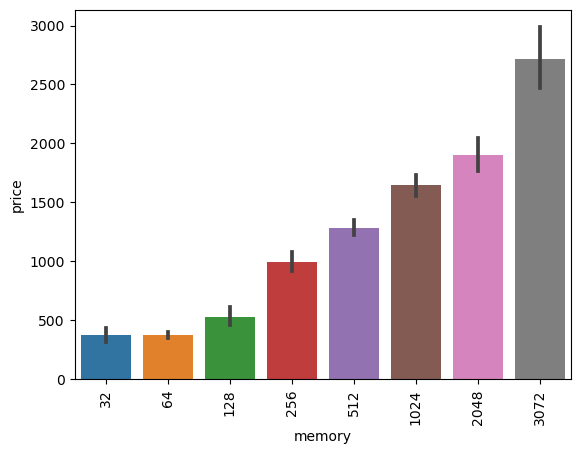

In [83]:
sns.barplot(x=cleaned_df['memory'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
cleaned_df['memory'].value_counts()

1024    379
512     337
2048    169
256     168
64       67
128      63
3072     49
32       23
Name: memory, dtype: int64

In [85]:
cleaned_df['operating_system'].unique()

array(['Windows 10 Pro', 'Windows 10', 'Windows 11 Pro',
       'Windows 11 Home', 'Windows 10 Home', 'Windows 11',
       '_Windows 11 Home', '_Windows 11 Pro', '_Windows 11', 'Windows',
       '_Windows 10 Pro', '_Windows 10 Home', '__Windows 11 Home',
       'Chrome OS', 'Mac OS', 'Windows 10 S', '_Chrome OS',
       'Windows 11 S', '__Chrome OS', '_Windows 10 S', '_Windows 11 S',
       '_Windows 10', 'Windows 10 Professional'], dtype=object)

In [86]:
cleaned_df['operating_system'] = cleaned_df['operating_system'].str.replace('_',"")

In [87]:
cleaned_df['operating_system'].unique()

array(['Windows 10 Pro', 'Windows 10', 'Windows 11 Pro',
       'Windows 11 Home', 'Windows 10 Home', 'Windows 11', 'Windows',
       'Chrome OS', 'Mac OS', 'Windows 10 S', 'Windows 11 S',
       'Windows 10 Professional'], dtype=object)

In [88]:
cleaned_df['operating_system'].value_counts()

Windows 11 Pro             394
Windows 11 Home            369
Windows 11                 114
Windows 10 Home             78
Windows 10 Pro              77
Chrome OS                   68
Mac OS                      64
Windows 10                  40
Windows 11 S                34
Windows 10 S                14
Windows                      2
Windows 10 Professional      1
Name: operating_system, dtype: int64

In [89]:
def operating_system(text):
    if text.split()[0] == 'Windows':
        return 'Windows'
    elif text.split()[0] == 'Mac':
        return 'Mac'
    else:
        return 'Others/Chrome OS'

In [90]:
cleaned_df['os'] = cleaned_df['operating_system'].apply(operating_system)

In [91]:
cleaned_df['os'].value_counts()

Windows             1123
Others/Chrome OS      68
Mac                   64
Name: os, dtype: int64

<AxesSubplot:xlabel='os', ylabel='price'>

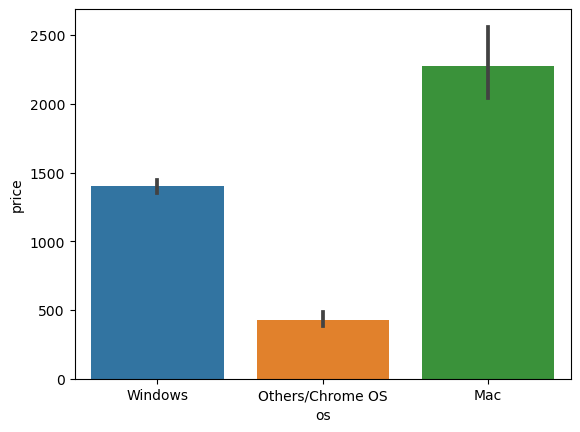

In [92]:
sns.barplot(x=cleaned_df['os'], y=cleaned_df['price'])

In [93]:
cleaned_df['graphics_copressor'].value_counts()

Intel       681
NVIDIA      336
AMD         164
Mac          64
MediaTek      6
Mediatek      3
ARM           1
Name: graphics_copressor, dtype: int64

In [94]:
cleaned_df = cleaned_df[~cleaned_df['graphics_copressor'].str.contains('MediaTek|Mediatek|ARM', case=False)]

In [95]:
cleaned_df['graphics_copressor'].value_counts()

Intel     681
NVIDIA    336
AMD       164
Mac        64
Name: graphics_copressor, dtype: int64

<AxesSubplot:xlabel='graphics_copressor', ylabel='price'>

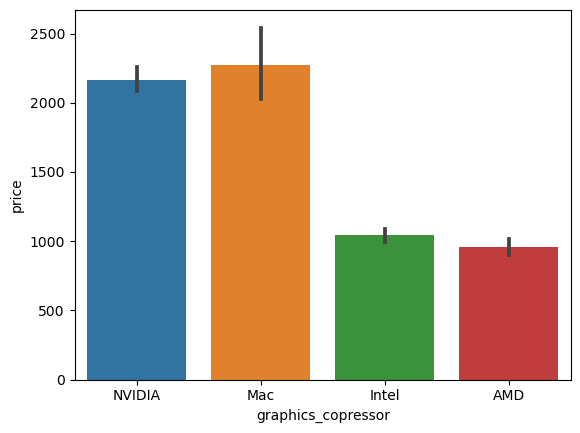

In [96]:
sns.barplot(x=cleaned_df['graphics_copressor'], y=cleaned_df['price'])

<AxesSubplot:xlabel='graphics_copressor', ylabel='price'>

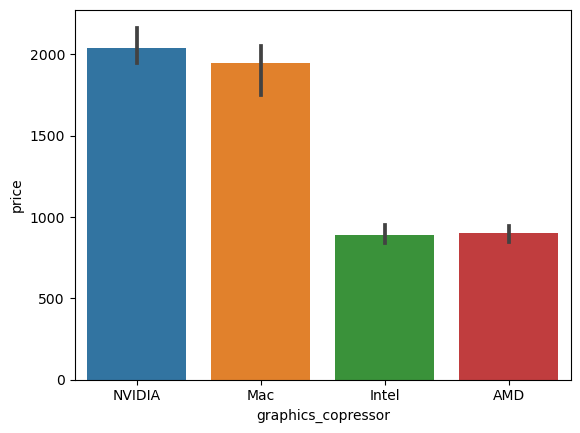

In [97]:
sns.barplot(x=cleaned_df['graphics_copressor'], y=cleaned_df['price'], estimator=np.median)

In [98]:
cleaned_df.sample(5)

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,...,processor_brand,touchable,ips,ppi,cpu_name,storage_range_category,ssd,emmc,memory,os
522,Samsung Galaxy Book3 360 2-in-1 Laptop 2023-15...,1645.0,Samsung,NP750QFG-KABGY,Intel Core i7,_3.2 GHz core_i7_family,Intel,16,512 GB SSD,Windows 11 Pro,...,Intel,0,0,141.211998,Intel Core i7,512 GB SSD,512,0,512,Windows
94,"HP Omen 16.1"" FHD Gaming Laptop (Intel Core i7...",1249.0,HP,HP Omen,Intel Core i7,_3.5 GHz core_i7,NVIDIA,16,1024 GB SSD,Windows 11,...,Intel,0,0,137.681698,Intel Core i7,1024 GB SSD,1024,0,1024,Windows
131,"HP Victus 15.6"" 144Hz FHD Gaming Laptop, Intel...",1129.0,HP,Victus,Intel Core i5,_2.1 GHz core_i5,NVIDIA,16,512 GB SSD,Windows 11 Home,...,Intel,0,0,141.211998,Intel Core i5,512 GB SSD,512,0,512,Windows
973,"Surface Laptop 3 13"" i7/16/512 Sandstone - French",1133.0,Microsoft,Surface Laptop 3,Intel Core i7,_3.9 GHz core_i7_1065g7,Intel,16,512 GB SSD,Windows 10 Home,...,Intel,0,0,200.842560,Intel Core i7,512 GB SSD,512,0,512,Windows
259,"Dell Alienware M16 R1 16"" 165Hz WQXGA (2560x16...",2941.0,Dell,Alienware m16 R1,Intel Core i7,_3.1 GHz core_i7_family,NVIDIA,16,1024 GB SSD,Windows 11 Pro,...,Intel,0,1,188.679623,Intel Core i7,1024 GB SSD,1024,0,1024,Windows


In [99]:
cleaned_df['num_processors'].unique()

array([ 4, 24, 14, 16,  8,  6,  1, 10, 12, 11,  2, 20])

In [100]:
cleaned_df['num_processors'].value_counts()

4     251
8     248
10    150
2     148
6     123
14     99
1      93
12     87
24     26
16     17
11      2
20      1
Name: num_processors, dtype: int64

<AxesSubplot:xlabel='num_processors', ylabel='price'>

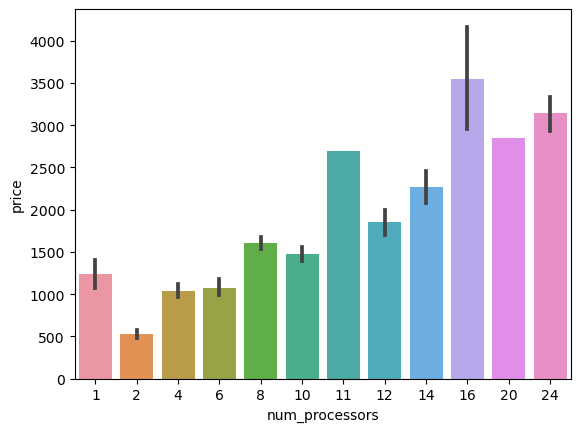

In [101]:
sns.barplot(x=cleaned_df['num_processors'], y=cleaned_df['price'])

In [106]:
cleaned_df = cleaned_df[~cleaned_df['num_processors'].isin([11,20])]


In [107]:
cleaned_df['num_processors'].unique()

array([ 4, 24, 14, 16,  8,  6,  1, 10, 12,  2])

<AxesSubplot:xlabel='num_processors', ylabel='price'>

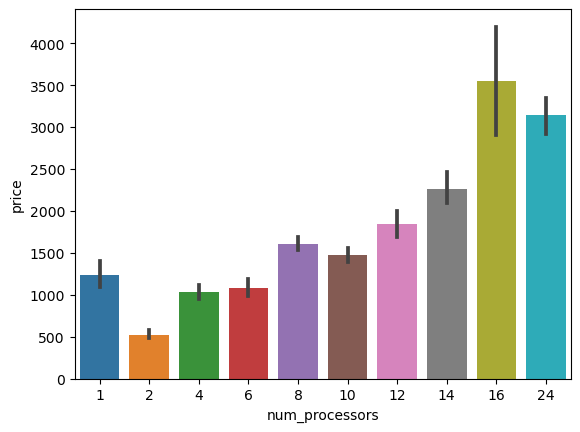

In [108]:
sns.barplot(x=cleaned_df['num_processors'], y=cleaned_df['price'])

## Dropping Extra Columns

In [109]:
cleaned_df.drop(columns=["title", "model_name", "storage","processor_brand", "operating_system", "model_name", "cpu_model", "ssd", "emmc", "storage_range_category", "processor"], inplace=True)


/var/folders/xz/lwbfvlv571j_h6ypxn81t_pc0000gn/T/ipykernel_20911/2447251904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns=["title", "model_name", "storage","processor_brand", "operating_system", "model_name", "cpu_model", "ssd", "emmc", "storage_range_category", "processor"], inplace=True)


In [110]:
cleaned_df.sample(5)

,price,manufacturer,graphics_copressor,ram,num_processors,touchable,ips,ppi,cpu_name,memory,os
803,599.0,HP,Intel,16,2,0,0,141.211998,Intel Celeron,1024,Windows
286,2499.0,Acer,NVIDIA,32,6,0,0,183.575598,Intel Core i9,1024,Windows
320,999.0,Lenovo,NVIDIA,8,4,0,0,141.211998,Intel Core i5,512,Windows
896,264.0,Lenovo,Intel,16,2,0,0,135.094211,Intel Celeron,128,Windows
1074,833.0,HP,AMD,16,8,0,0,165.632118,AMD Ryzen 7,512,Windows


In [113]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1261
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1242 non-null   float64
 1   manufacturer        1242 non-null   object 
 2   graphics_copressor  1242 non-null   object 
 3   ram                 1242 non-null   int32  
 4   num_processors      1242 non-null   int64  
 5   touchable           1242 non-null   int64  
 6   ips                 1242 non-null   int64  
 7   ppi                 1242 non-null   float64
 8   cpu_name            1242 non-null   object 
 9   memory              1242 non-null   int64  
 10  os                  1242 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 111.6+ KB


In [114]:
cleaned_df.duplicated().sum()

137

In [115]:
cleaned_df.isnull().sum()

price                 0
manufacturer          0
graphics_copressor    0
ram                   0
num_processors        0
touchable             0
ips                   0
ppi                   0
cpu_name              0
memory                0
os                    0
dtype: int64

In [116]:
laptop_df = cleaned_df.drop_duplicates()

In [117]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105 entries, 0 to 1261
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1105 non-null   float64
 1   manufacturer        1105 non-null   object 
 2   graphics_copressor  1105 non-null   object 
 3   ram                 1105 non-null   int32  
 4   num_processors      1105 non-null   int64  
 5   touchable           1105 non-null   int64  
 6   ips                 1105 non-null   int64  
 7   ppi                 1105 non-null   float64
 8   cpu_name            1105 non-null   object 
 9   memory              1105 non-null   int64  
 10  os                  1105 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 99.3+ KB


In [118]:
laptop_df

,price,manufacturer,graphics_copressor,ram,num_processors,touchable,ips,ppi,cpu_name,memory,os
0,2287.0,Microsoft,NVIDIA,8,4,1,0,267.077872,Intel Core i7,256,Windows
1,2999.0,Microsoft,NVIDIA,16,4,1,0,240.370085,Intel Core i7,256,Windows
2,2995.0,Dell,NVIDIA,64,24,0,0,141.211998,Intel Core i9,2048,Windows
3,1999.0,Dell,NVIDIA,8,14,0,0,141.509717,Intel Core i7,1024,Windows
4,2999.0,Microsoft,NVIDIA,16,4,0,0,240.370085,Intel Core i7,1024,Windows
...,...,...,...,...,...,...,...,...,...,...,...
1257,1349.0,Lenovo,AMD,16,8,1,1,157.350512,AMD Ryzen 7,1024,Windows
1258,589.0,Lenovo,Intel,20,4,0,0,141.211998,Other Intel Processor,1024,Windows
1259,5340.0,Lenovo,NVIDIA,32,1,0,0,188.679623,Intel Core i9,1024,Windows
1260,1848.0,Lenovo,NVIDIA,32,4,1,1,157.350512,Intel Core i7,1024,Windows


In [119]:
laptop_df.corr()['price']

price             1.000000
ram               0.521539
num_processors    0.599387
touchable        -0.010926
ips               0.149676
ppi               0.505140
memory            0.534030
Name: price, dtype: float64

<AxesSubplot:>

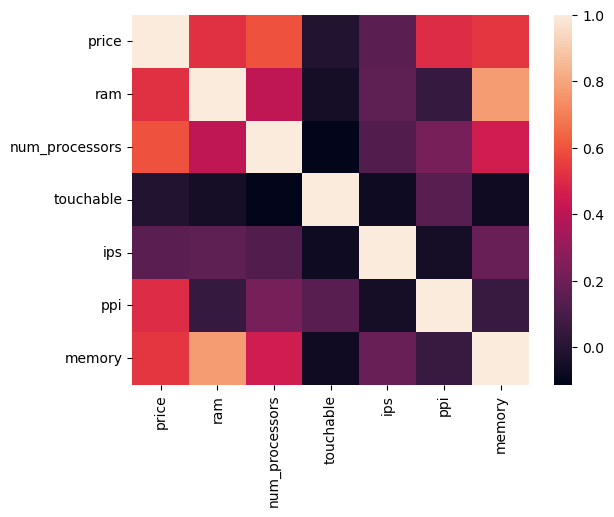

In [120]:
sns.heatmap(laptop_df.corr())

/Users/shoaib/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

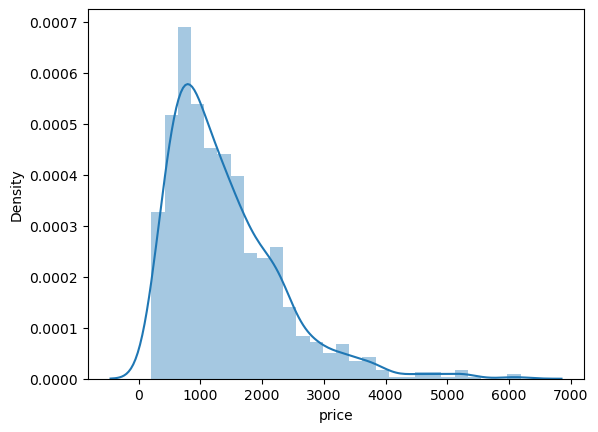

In [121]:
sns.distplot(laptop_df['price'])

/Users/shoaib/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

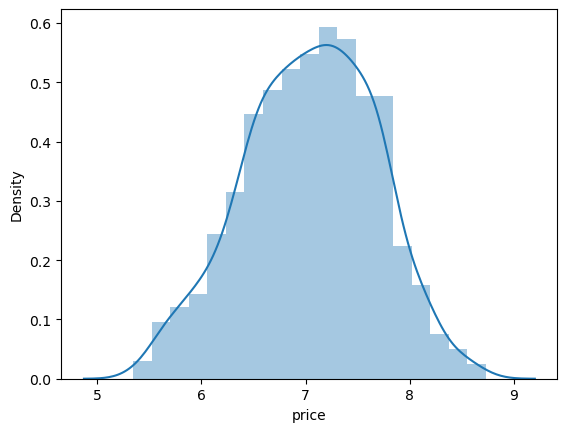

In [122]:
sns.distplot(np.log(laptop_df['price']))

In [123]:
laptop_df.to_csv('data/laptop_df.csv')